In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df.head()

,RID,Case ID,Sentence Year,Offender ID,Sex,Age Range,Ethnicity,No. of Charges,Offense Severity Group,Type of Homicide,...,Time of Crime Commited,Sentence Imposed,Sentence Suspended,Sentence to Serve,Sentence on Probation,Amount (VVCA),Amount (FINE),Amount (REST),Amount (FSUS),Type of Offense
0,22096,6527757,2012.0,6546444,M,31-40,Black,2.0,D2,NaN,...,Evening,64.0,0.0,NaN,0.0,300.0,0.0,0.0,0.0,Drug
1,14510,143392,2015.0,4910372,M,31-40,Black,1.0,D3,NaN,...,Night,20.0,0.0,15.0,0.0,300.0,0.0,0.0,0.0,Drug
2,17388,5892669,2014.0,228984,M,51-60,Black,1.0,M7,NaN,...,Night,24.0,6.0,12.0,12.0,300.0,0.0,0.0,0.0,Weapon
3,10132,2388867,2017.0,2304561,M,22-30,Black,3.0,M8,NaN,...,Afternoon,16.0,0.0,12.0,0.0,300.0,0.0,0.0,0.0,Violent
4,23493,9812651,2012.0,3025825,M,31-40,White,3.0,D2,NaN,...,Evening,4.0,0.0,3.0,0.0,300.0,0.0,0.0,0.0,Drug


In [4]:
df.isnull().sum()

RID                           0
Case ID                       0
Sentence Year               611
Offender ID                   0
Sex                         156
Age Range                   751
Ethnicity                   680
No. of Charges              318
Offense Severity Group     3046
Type of Homicide          16763
Type of Sentence            589
Presence of Witnesses       668
Time of Crime Commited        0
Sentence Imposed            682
Sentence Suspended          687
Sentence to Serve           708
Sentence on Probation       429
Amount (VVCA)               347
Amount (FINE)               663
Amount (REST)               437
Amount (FSUS)               343
Type of Offense               1
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17285 entries, 0 to 17284
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RID                     17285 non-null  int64  
 1   Case ID                 17285 non-null  int64  
 2   Sentence Year           16674 non-null  float64
 3   Offender ID             17285 non-null  int64  
 4   Sex                     17129 non-null  object 
 5   Age Range               16534 non-null  object 
 6   Ethnicity               16605 non-null  object 
 7   No. of Charges          16967 non-null  float64
 8   Offense Severity Group  14239 non-null  object 
 9   Type of Homicide        522 non-null    object 
 10  Type of Sentence        16696 non-null  object 
 11  Presence of Witnesses   16617 non-null  object 
 12  Time of Crime Commited  17285 non-null  object 
 13  Sentence Imposed        16603 non-null  float64
 14  Sentence Suspended      16598 non-null

In [6]:
unique_counts = df.nunique()

# Write the number of unique values for each column
for column, count in unique_counts.iteritems():
    print(f"{column}\t': {count}")

RID	': 17285
Case ID	': 13541
Sentence Year	': 11
Offender ID	': 12220
Sex	': 2
Age Range	': 8
Ethnicity	': 7
No. of Charges	': 56
Offense Severity Group	': 13
Type of Homicide	': 4
Type of Sentence	': 7
Presence of Witnesses	': 3
Time of Crime Commited	': 4
Sentence Imposed	': 157
Sentence Suspended	': 66
Sentence to Serve	': 155
Sentence on Probation	': 31
Amount (VVCA)	': 32
Amount (FINE)	': 11
Amount (REST)	': 215
Amount (FSUS)	': 2
Type of Offense	': 7


<ipython-input-6-af2898b346ff>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in unique_counts.iteritems():


In [7]:
df['Type of Homicide'].value_counts() #lesser value hence remove this column

Murder II                   210
Voluntary Manslaughter      152
Murder I                    133
Involuntary Manslaughter     27
Name: Type of Homicide, dtype: int64

In [8]:
df['Ethnicity'].value_counts()

Black               15128
Other or Unknown      805
White                 615
Hispanic               38
Asian                  13
Native American         5
Pacific Islander        1
Name: Ethnicity, dtype: int64

In [9]:
unique_counts = df.nunique()

# Write the number of unique values for each column
for column, count in unique_counts.iteritems():
    print(f"{column}\t': {count}")


RID	': 17285
Case ID	': 13541
Sentence Year	': 11
Offender ID	': 12220
Sex	': 2
Age Range	': 8
Ethnicity	': 7
No. of Charges	': 56
Offense Severity Group	': 13
Type of Homicide	': 4
Type of Sentence	': 7
Presence of Witnesses	': 3
Time of Crime Commited	': 4
Sentence Imposed	': 157
Sentence Suspended	': 66
Sentence to Serve	': 155
Sentence on Probation	': 31
Amount (VVCA)	': 32
Amount (FINE)	': 11
Amount (REST)	': 215
Amount (FSUS)	': 2
Type of Offense	': 7


<ipython-input-9-af2898b346ff>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in unique_counts.iteritems():


In [10]:
#@title Feature engineering
df['total_amt'] = df['Amount (VVCA)'] + df['Amount (FINE)'] + df['Amount (REST)'] - df['Amount (FSUS)'] # FSUS in suspended fine, hence substracted
df["Total Sentence"] = df["Sentence Imposed"].fillna(0) - df["Sentence Suspended"].fillna(0) + df["Sentence to Serve"].fillna(0) + df["Sentence on Probation"].fillna(0)


In [11]:
#@title Dropping unwanted columns
df = df.drop(['RID','Case ID','Offender ID'],axis=1)
df_test = df_test.drop(['RID','Case ID','Offender ID'],axis=1)
df.drop([ 'Amount (VVCA)', 'Amount (FINE)', 'Amount (REST)', 'Amount (FSUS)'], axis=1, inplace=True)
df = df.drop(["Sentence Imposed", "Sentence Suspended", "Sentence to Serve", "Sentence on Probation"], axis=1)

In [12]:
df.isnull().sum()

Sentence Year               611
Sex                         156
Age Range                   751
Ethnicity                   680
No. of Charges              318
Offense Severity Group     3046
Type of Homicide          16763
Type of Sentence            589
Presence of Witnesses       668
Time of Crime Commited        0
Type of Offense               1
total_amt                  1739
Total Sentence                0
dtype: int64

In [13]:
df['Age Range'].value_counts()
# here its well distributed

22-30    5741
18-21    3759
31-40    3115
41-50    2067
51-60    1158
15-17     463
61-70     214
71+        17
Name: Age Range, dtype: int64

In [14]:
df['No. of Charges'].value_counts()

1.0      10529
2.0       2578
3.0       1105
4.0        596
5.0        436
6.0        269
7.0        248
8.0        160
9.0        158
10.0       123
11.0       101
13.0        91
12.0        84
15.0        55
14.0        51
17.0        45
16.0        40
18.0        28
19.0        26
22.0        22
20.0        20
21.0        19
27.0        16
23.0        14
28.0        13
25.0        13
32.0        11
31.0        11
30.0        10
29.0        10
24.0         9
26.0         8
35.0         8
33.0         8
34.0         7
36.0         5
38.0         4
40.0         4
45.0         3
37.0         3
39.0         3
41.0         3
47.0         2
50.0         2
69.0         2
67.0         2
42.0         2
44.0         2
65.0         1
46.0         1
43.0         1
68.0         1
106.0        1
64.0         1
48.0         1
53.0         1
Name: No. of Charges, dtype: int64

In [15]:
df['total_amt'] = df['total_amt'].fillna(0) # usually no charges =0 charges :)
df['No. of Charges'] = df['No. of Charges'].fillna(0) #similarly for num of charges

#other columns can be replaced by mean
for col in df.columns:
    if df[col].isna().any():
        if(df[col].dtype!='O'):
          df[col].fillna(df[col].mean(), inplace=True)# for numerical columns->replace with mean
        else:
          df[col].fillna(df[col].mode()[0],inplace=True)# for cateorical columns-->replace by mode

In [16]:
df.isnull().sum()
#removed all null values

Sentence Year             0
Sex                       0
Age Range                 0
Ethnicity                 0
No. of Charges            0
Offense Severity Group    0
Type of Homicide          0
Type of Sentence          0
Presence of Witnesses     0
Time of Crime Commited    0
Type of Offense           0
total_amt                 0
Total Sentence            0
dtype: int64

<Figure size 1000x600 with 0 Axes>

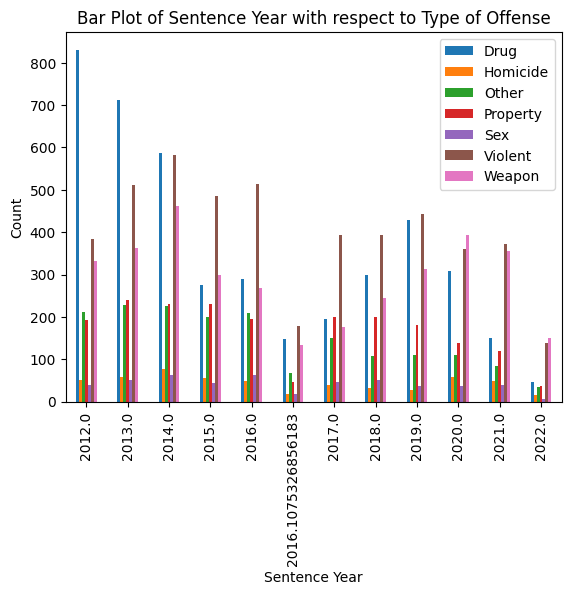

<Figure size 1000x600 with 0 Axes>

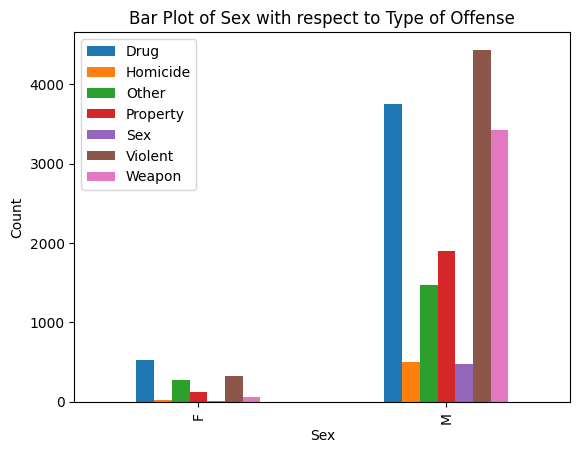

<Figure size 1000x600 with 0 Axes>

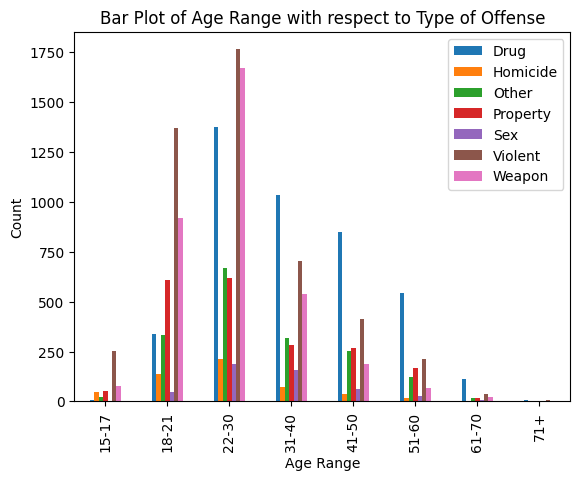

<Figure size 1000x600 with 0 Axes>

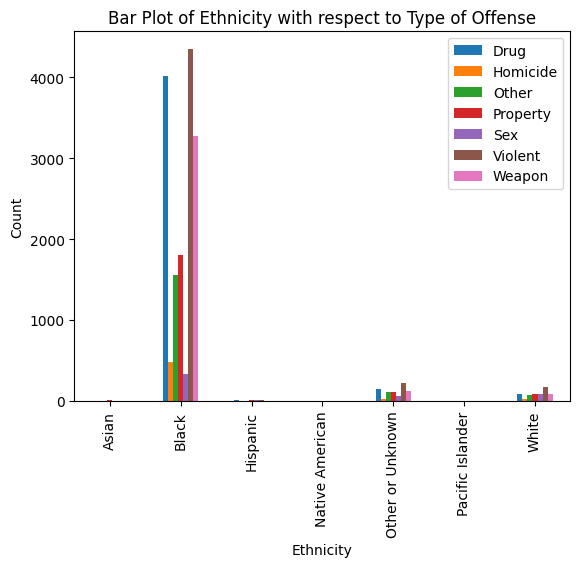

<Figure size 1000x600 with 0 Axes>

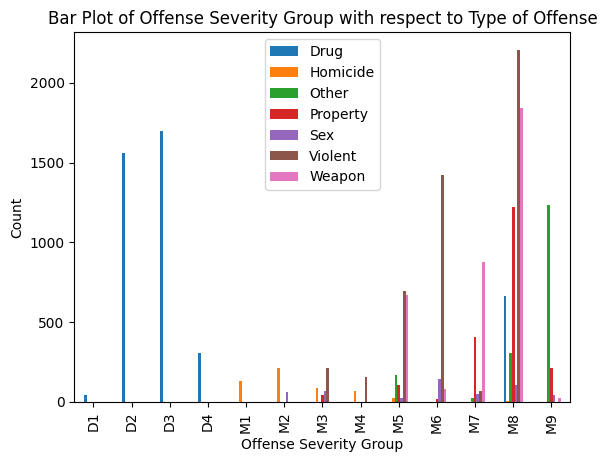

<Figure size 1000x600 with 0 Axes>

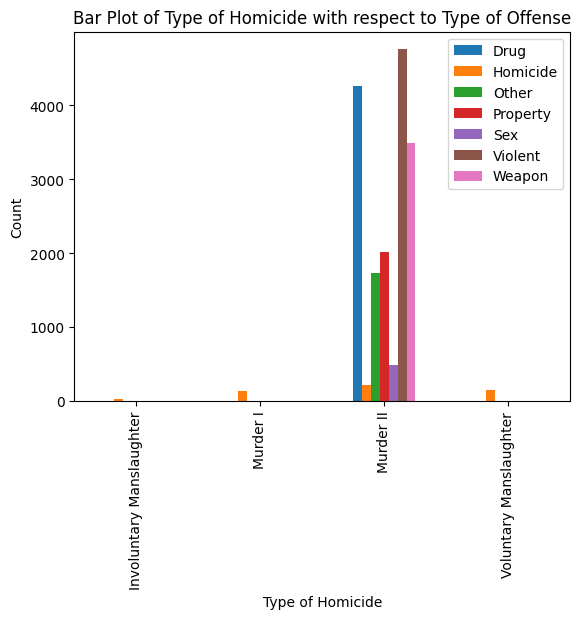

<Figure size 1000x600 with 0 Axes>

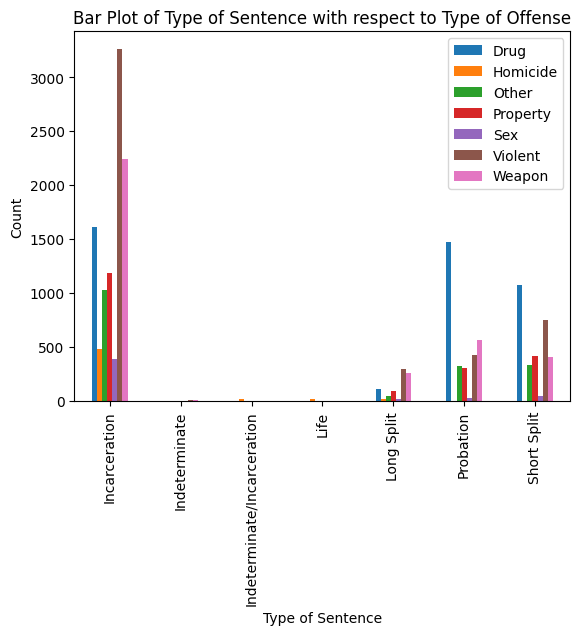

<Figure size 1000x600 with 0 Axes>

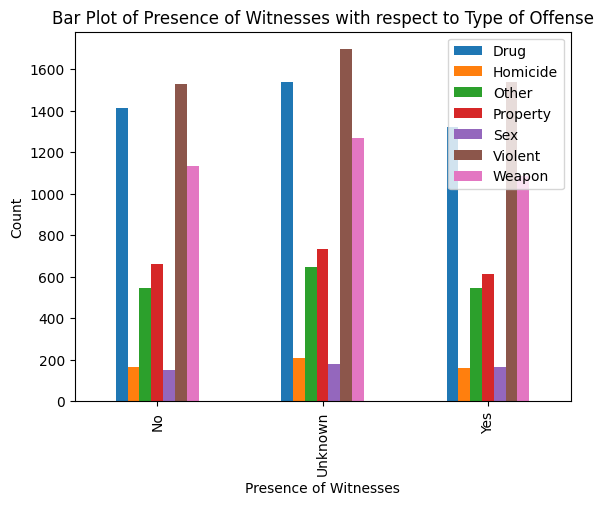

<Figure size 1000x600 with 0 Axes>

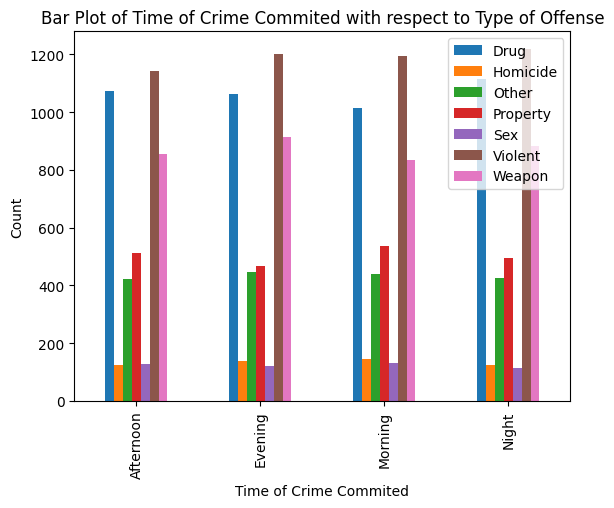

<Figure size 1000x600 with 0 Axes>

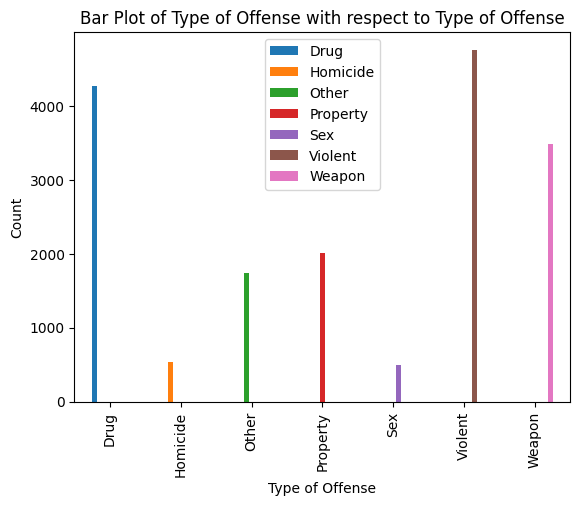

In [17]:
#@title Data Visualisation
import matplotlib.pyplot as plt

excluded_columns = ['No. of Charges', 'total_amt', 'Total Sentence']


variables = [col for col in df.columns if col not in excluded_columns]


for var in variables :
    plt.figure(figsize=(10, 6))
    grouped_data = df.groupby([var, 'Type of Offense']).size().unstack()
    grouped_data.plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {var} with respect to Type of Offense')
    plt.legend()
    plt.show()


<ipython-input-18-7f491445f12e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


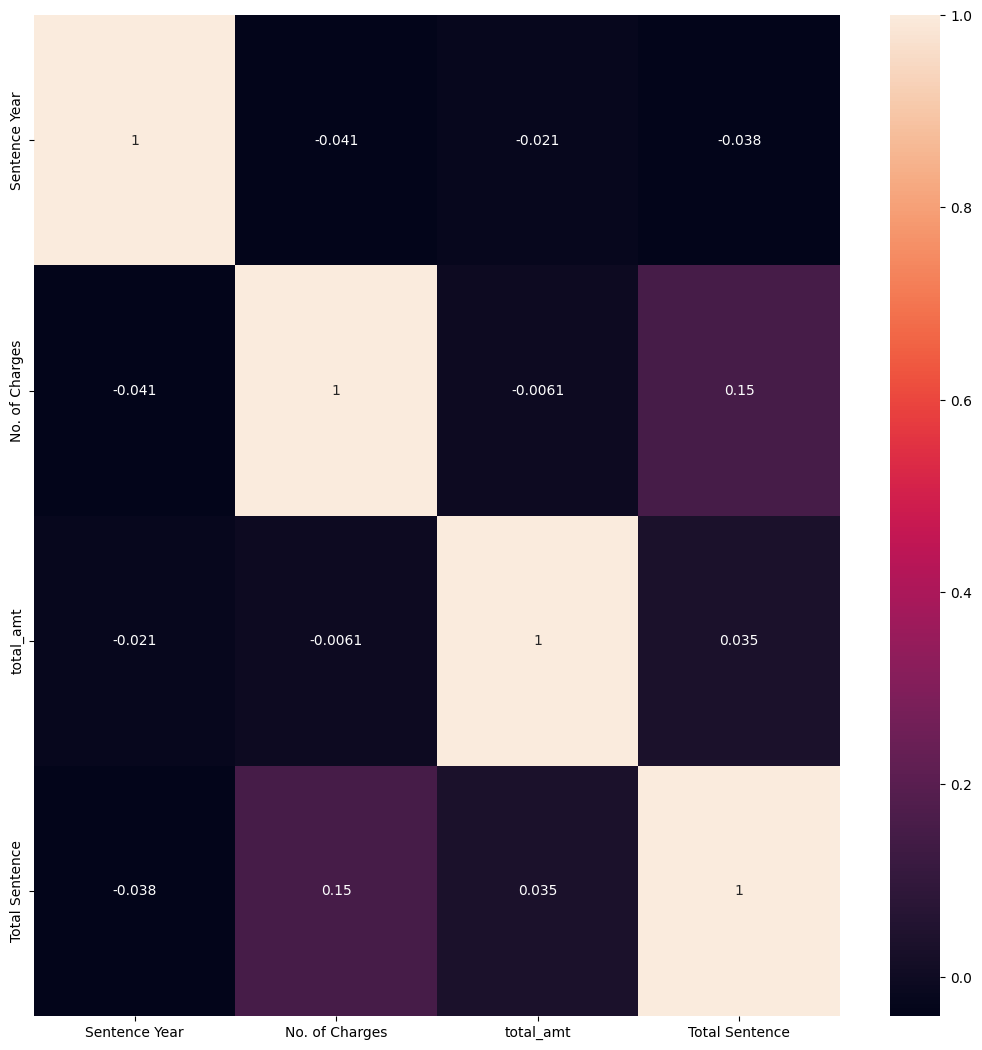

In [18]:
plt.subplots(figsize=(13,13))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
#@title Encoding
#label Encoding --->all object dtype to int or float
to_encode = [col for col in df.columns if df[col].dtype == 'O']
encs = {}

for col in to_encode:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encs[col] = enc

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17285 entries, 0 to 17284
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentence Year           17285 non-null  float64
 1   Sex                     17285 non-null  int64  
 2   Age Range               17285 non-null  int64  
 3   Ethnicity               17285 non-null  int64  
 4   No. of Charges          17285 non-null  float64
 5   Offense Severity Group  17285 non-null  int64  
 6   Type of Homicide        17285 non-null  int64  
 7   Type of Sentence        17285 non-null  int64  
 8   Presence of Witnesses   17285 non-null  int64  
 9   Time of Crime Commited  17285 non-null  int64  
 10  Type of Offense         17285 non-null  int64  
 11  total_amt               17285 non-null  float64
 12  Total Sentence          17285 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [21]:
df.head()

,Sentence Year,Sex,Age Range,Ethnicity,No. of Charges,Offense Severity Group,Type of Homicide,Type of Sentence,Presence of Witnesses,Time of Crime Commited,Type of Offense,total_amt,Total Sentence
0,2012.0,1,3,1,2.0,1,2,0,1,1,0,300.0,64.0
1,2015.0,1,3,1,1.0,2,2,0,0,3,0,300.0,35.0
2,2014.0,1,5,1,1.0,10,2,4,1,3,6,300.0,42.0
3,2017.0,1,2,1,3.0,11,2,0,1,0,5,300.0,28.0
4,2012.0,1,3,6,3.0,1,2,0,1,1,0,300.0,7.0


In [22]:
#@title Splitting Dataset - Train ,CV,Test

In [23]:
from sklearn.model_selection import train_test_split
Y=df['Type of Offense']
X = df.drop('Type of Offense', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


x_tr, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [24]:
print("Train set rows :",x_tr.shape[0])
print("CV set rows :",x_cv.shape[0])
print("Test set rows :",x_test.shape[0])

Train set rows : 10889
CV set rows : 1210
Test set rows : 5186


In [25]:
from xgboost.sklearn import XGBRanker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold  # Optional, if you want to specify the number of folds
from sklearn.model_selection import GridSearchCV


In [26]:
lr = LogisticRegression(max_iter=2048)
lr.fit(x_tr,y_tr)
y_pred_lr=lr.predict(x_cv)
print("Accuracy:", accuracy_score(y_cv, y_pred_lr))

cross_val_scores = cross_val_score(lr, x_train, y_train, cv=5)
print(f" Cross Validation Score: :{cross_val_scores}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5239669421487604


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

 Cross Validation Score: :[0.55       0.54049587 0.55       0.56239669 0.55973543]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
#@title XGBoost
import xgboost as xgb
xgb_clf_base = xgb.XGBClassifier()
xgb_clf_base.fit(x_tr, y_tr)
y_pred_xgb = xgb_clf_base.predict(x_cv)
accuracy = accuracy_score(y_cv, y_pred_xgb)
print(f"Accuracy: {accuracy}")

cross_val_scores = cross_val_score(xgb_clf_base, x_train, y_train, cv=5)
print(f" Cross Validation  Score before Tuning: :{cross_val_scores}")

Accuracy: 0.6991735537190082
 Cross Validation  Score before Tuning: :[0.70743802 0.71446281 0.71528926 0.71157025 0.69739562]


In [64]:
#@title HyperTuning XGBoost
#initial parameters
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi:softmax',# as we want multiclass classification
 nthread=4,
 scale_pos_weight=1,
 seed=27)


xgb1.fit(x_tr, y_tr)
y_pred_xgb = xgb1.predict(x_cv)

accuracy = accuracy_score(y_cv, y_pred_xgb)
print(f"Accuracy: {accuracy}")

cross_val_scores = cross_val_score(xgb1, x_train, y_train, cv=5)
print(f" Cross Validation  Score before Tuning: :{cross_val_scores}")


[16:39:49] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Accuracy: 0.6942148760330579
[16:40:30] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[16:41:08] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[16:41:44] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[16:42:20] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[16:42:56] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

 Cross Validation  Score before Tuning: :[0.70206612 0.68719008 0.70289256 0.69586777 0.69450186]


In [58]:
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [5, 10, 20, None],

}

xgb_clf =XGBClassifier(random_state=42)


grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_cv, y_cv)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': None, 'n_estimators': 100}


n_estimater is tuned=100.
Now lets tune lr and child weight

In [54]:
param_grid = {

 'learning_rate' :[0.1,0.05,0.01],
  'min_child_weight':[0.10,1,10,20]
}

xgb_clf =XGBClassifier(random_state=42,max_depth=None,n_estimators=100)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_cv, y_cv)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'min_child_weight': 10}


In [68]:
param_grid = {

 'subsample':[0.6,0.8,0.9],
 'colsample_bytree':[0.6,0.9,0.1]
}

xgb_clf =XGBClassifier(random_state=42,max_depth=None,n_estimators=100)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_cv, y_cv)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'colsample_bytree': 0.9, 'subsample': 0.8}


Above I tried to tune *2 parametrs* at a time . Below im tuning *multiple parameters*.Though this took longer,model performance improved.
**NOTE**: Tuning together gives different values for each parameter

In [71]:
param_grid = {
    'learning_rate' :[0.1,0.05,0.01],
  'min_child_weight':[0.10,1,10,20],
 'subsample':[0.6,0.8,0.9],
 'colsample_bytree':[0.6,0.9,0.1],

}

xgb_clf =XGBClassifier(random_state=42,max_depth=None,n_estimators=100)

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_cv, y_cv)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'min_child_weight': 0.1, 'subsample': 0.6}


now that 6 parameteers are tuned lets see CV scores after tuning

In [73]:
xgb_clf_final =XGBClassifier(random_state=42,max_depth=None,n_estimators=100,learning_rate=0.1,min_child_weight=0.1,subsample=0.6,colsample_bytree=0.9)
xgb_clf_final.fit(x_tr,y_tr)
y_pred = xgb_clf_final.predict(x_cv)

print("Accuracy:", accuracy_score(y_cv, y_pred))

cross_val_scores = cross_val_score(xgb_clf_final, x_train, y_train, cv=5)
print(f" Cross Validation Score after tuning :{cross_val_scores}")

Accuracy: 0.6950413223140496
 Cross Validation Score after tuning :[0.71404959 0.70702479 0.72438017 0.70950413 0.70773047]


**Note the improvement in CV Score**(0.70-->0.724)

In [59]:
#@title Random Forest
rf = RandomForestClassifier(n_estimators=2000)
rf.fit(x_tr, y_tr)
y_pred = rf.predict(x_cv)

print("Accuracy:", accuracy_score(y_cv, y_pred))

cross_val_scores = cross_val_score(rf, x_train, y_train, cv=5)
print(f" Cross Validation Score before Tuning :{cross_val_scores}")




Accuracy: 0.6900826446280992
 Cross Validation Score before Tuning :[0.69752066 0.69421488 0.70165289 0.69338843 0.68706077]


In [60]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_cv, y_cv)

print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 200}


In [61]:
rf = RandomForestClassifier(random_state=42,max_depth=20,n_estimators=200)

rf.fit(x_train,y_train)
cross_val_scores = cross_val_score(rf, x_train, y_train, cv=5)
print(f" Cross Validation Score after  tuning: :{cross_val_scores}")

 Cross Validation Score after  tuning: :[0.70247934 0.70082645 0.70950413 0.70123967 0.69822241]


CV improved here too even though only a 2 parameters were
 tuned.

In [95]:
#@title Comparing Test Results
print("----LR-------")
y_pred_test=lr.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("precision :" ,precision_score(y_test, y_pred_test,average='weighted'))
print( "recall :",recall_score(y_test, y_pred_test,average='weighted'))
print( "F1 Score :",f1_score(y_test, y_pred_test,average='weighted'))
print("\n")

print("-RandomForest-")
y_pred_test=rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("precision :" ,precision_score(y_test, y_pred_test,average='weighted'))
print( "recall :",recall_score(y_test, y_pred_test,average='weighted'))
print( "F1 Score :",f1_score(y_test, y_pred_test,average='weighted'))
print("\n")

print("--XGBoost_Base--")
y_pred_test=xgb1.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("precision :" ,precision_score(y_test, y_pred_test,average='weighted'))
print( "recall :",recall_score(y_test, y_pred_test,average='weighted'))
print( "F1 Score :",f1_score(y_test, y_pred_test,average='weighted'))
print("\n")


print("--XGBoost_Tuned---")
y_pred_test=xgb_clf_final.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("precision :" ,precision_score(y_test, y_pred_test,average='weighted'))
print( "recall :",recall_score(y_test, y_pred_test,average='weighted'))
print( "F1 Score :",f1_score(y_test, y_pred_test,average='weighted'))

----LR-------
Accuracy: 0.540107983031238
precision : 0.5247583075202226
recall : 0.540107983031238
F1 Score : 0.4888477653183029


-RandomForest-
Accuracy: 0.7065175472425762
precision : 0.7041397482315297
recall : 0.7065175472425762
F1 Score : 0.6952612036705783


--XGBoost_Base--
Accuracy: 0.7070960277670651
precision : 0.7021170079742504
recall : 0.7070960277670651
F1 Score : 0.7005805904339918


--XGBoost_Tuned---
Accuracy: 0.71789433089086
precision : 0.7167035470134197
recall : 0.71789433089086
F1 Score : 0.7074293799725535
